# `Pandas`
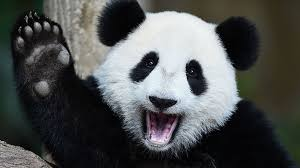

The `pandas` library is practically use for any data manipulation task in python. As a result, learnung `pandas` is a great skill to have as data scientists. 

During this class time we will be using the `colleges_dataset_not_cleaned.csv` datset we made last class after web scraping money.com 

Before we do anything lets first explore the datasets first (visually)

Now that we know what to do, lets first start off by importing the `pandas` library

In [1]:
import pandas as pd
pd.options.display.max_columns = 30
import numpy as np

Before we can even do anything to this dataset we need to read it. Read in the dataset using `pandas` below.

## Exploring the Data

Awesome, now lets explore the datset with `pandas`

## Cleaning the Data

First lets delete the column `Unnamed: 0`, this is bascially the index, but we don't need this since `pandas` does this for us

### Exploring Missing Values

Now lets explore some of the missing values.

`pandas` is smart, so it is able to detect the missing values even though we initially read them in as strings, notice how the column types are still also objects. 

In [7]:
college_df.isnull().sum()

college_names                                    0
college_location                                 0
overall_score                                    0
acceptance_rate                                  0
Est_full_price_22_23                             0
Est_price_with_avg_grant                         0
percent_of_student_who_get_grants                0
graduation_rate                                  0
early_career_earnings                            0
avg_price_for_low_income_students                0
median_sat_act_score                             1
sat_act_required                                 0
undergrad_enrollment                             0
percent_of_students_with_need_who_get_grants    18
percent_of_need_met                             31
percent_of_students_who_get_merit_grants        39
avg_merit_grant                                 38
avg_time_to_a_degree                             0
median_student_debt                              0
percent_earning_more_than_a_hig

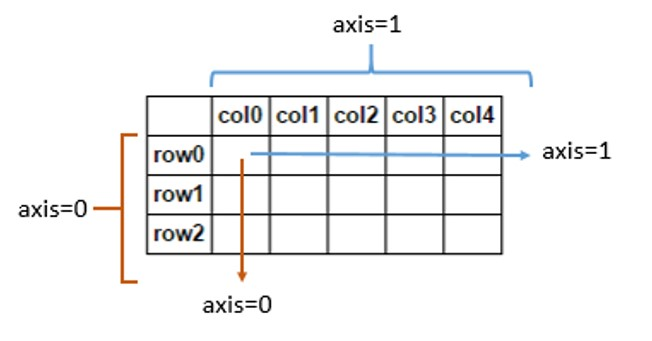

In [13]:
college_df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
618     True
619     True
620     True
621     True
622     True
Length: 623, dtype: bool

Output all the rows that have a missing value in them

So pandas can detect the `NaN` values but how about this: https://money.com/best-colleges/profile/ringling-college-of-art-and-design/

In [15]:
np.sum(college_df['median_sat_act_score'] == 'NA/NA')

90

Let will talk about how to deal with this a bit later :)

Now lets expand some of these columns. Create the following columns - 

1) `Town` and `State` that are the town and state of their respectize college
2) `median_sat` and `median_act` that are the sat and act of the respective college

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

Notice how the original columns are still there, drop these columns inplace

Print out the 3rd element of the first row, what do you notice?

How do we get rid of the problem above? Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html

In the cell below replace all the values of columns with whitespace without any whitespace

### Formatting Missing Values

In [24]:
college_df.isnull().sum()

college_names                                    0
overall_score                                    0
acceptance_rate                                  0
Est_full_price_22_23                             0
Est_price_with_avg_grant                         0
percent_of_student_who_get_grants                0
graduation_rate                                  0
early_career_earnings                            0
avg_price_for_low_income_students                0
sat_act_required                                 0
undergrad_enrollment                             0
percent_of_students_with_need_who_get_grants    18
percent_of_need_met                             31
percent_of_students_who_get_merit_grants        39
avg_merit_grant                                 38
avg_time_to_a_degree                             0
median_student_debt                              0
percent_earning_more_than_a_high_school_grad     1
Town                                             0
State                          

In [313]:
np.sum(college_df == 'NA', axis = 0) + np.sum(college_df == 'N/A', axis = 0)

college_names                                     0
overall_score                                     0
acceptance_rate                                   1
Est_full_price_22_23                              0
Est_price_with_avg_grant                          0
percent_of_student_who_get_grants                 0
graduation_rate                                   0
early_career_earnings                             1
avg_price_for_low_income_students                 0
sat_act_required                                  0
undergrad_enrollment                              0
percent_of_students_with_need_who_get_grants      0
percent_of_need_met                               0
percent_of_students_who_get_merit_grants          0
avg_merit_grant                                   0
avg_time_to_a_degree                              0
median_student_debt                               0
percent_earning_more_than_a_high_school_grad      0
Town                                              0
State       

In [314]:
n_cols = np.array(np.sum(college_df == 'NA', axis = 0) + np.sum(college_df == 'N/A', axis = 0)  > 0)
n_cols

array([False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True])

Replace the blanks with the actual indexed values

In [315]:
college_df.iloc[__, ___] = college_df.iloc[____, ___].replace(["NA", "N/A"], np.nan)

In [1]:
college_df.isna().sum()

## Changing Series types

In [317]:
college_df.dtypes

college_names                                    object
overall_score                                   float64
acceptance_rate                                  object
Est_full_price_22_23                             object
Est_price_with_avg_grant                         object
percent_of_student_who_get_grants                object
graduation_rate                                  object
early_career_earnings                            object
avg_price_for_low_income_students                object
sat_act_required                                 object
undergrad_enrollment                             object
percent_of_students_with_need_who_get_grants     object
percent_of_need_met                              object
percent_of_students_who_get_merit_grants         object
avg_merit_grant                                  object
avg_time_to_a_degree                             object
median_student_debt                              object
percent_earning_more_than_a_high_school_grad    

In [318]:
print(college_df["overall_score"][0])
type(college_df["overall_score"][0])

89.41


numpy.float64

Covnert the `median_sat` and `median_act`to a `float64` type: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.astype.html

In [319]:
college_df["median_sat"] = college_df["median_sat"].astype('float64')
college_df["median_act"] = college_df["median_act"].astype('float64')

In [320]:
college_df.dtypes

college_names                                    object
overall_score                                   float64
acceptance_rate                                  object
Est_full_price_22_23                             object
Est_price_with_avg_grant                         object
percent_of_student_who_get_grants                object
graduation_rate                                  object
early_career_earnings                            object
avg_price_for_low_income_students                object
sat_act_required                                 object
undergrad_enrollment                             object
percent_of_students_with_need_who_get_grants     object
percent_of_need_met                              object
percent_of_students_who_get_merit_grants         object
avg_merit_grant                                  object
avg_time_to_a_degree                             object
median_student_debt                              object
percent_earning_more_than_a_high_school_grad    

## Reformatting Values

Reformat strings

In [321]:
def reformat(string):
    try:
        remove_characters = "%$,"
        for character in remove_characters:
            string = string.replace(character, "")
        return string
    except:
        return string

In [322]:
for col in college_df.columns.difference(['overall_score', 'median_sat', 'median_act', 'avg_time_to_a_degree', 'Town', 'State', 'college_names', 'sat_act_required']):
    college_df[col] = college_df[col].apply(reformat)

In [323]:
college_df.head()

,college_names,overall_score,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,percent_of_student_who_get_grants,graduation_rate,early_career_earnings,avg_price_for_low_income_students,sat_act_required,undergrad_enrollment,percent_of_students_with_need_who_get_grants,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree,median_student_debt,percent_earning_more_than_a_high_school_grad,Town,State,median_sat,median_act
0,University of Michigan,89.41,23,32400,18800,53,92,75840,2670,No,31050,81,92,11,5670,4.2 years,18526,81,Ann Arbor,MI,1440.0,33.0
1,University of North Carolina at Chapel Hill,86.22,23,25200,10600,53,89,61920,3750,No,19010,90,100,5,7030,4.1 years,14500,78,Chapel Hill,NC,1410.0,31.0
2,University of Virginia,86.11,24,36700,20100,48,94,77050,12480,No,16720,91,100,4,5630,4.1 years,18250,84,Charlottesville,VA,1430.0,32.0
3,Massachusetts Maritime Academy,86.07,91,31600,18600,43,73,91670,6380,No,1650,56,71,11,5530,4.2 years,26000,91,Buzzards Bay,MA,1100.0,22.0
4,Virginia Military Institute,85.14,60,33300,20000,85,78,71910,10560,No,1700,77,88,14,13100,4.1 years,21500,85,Lexington,VA,1180.0,25.0


finish changing dtypes

In [324]:
college_df["sat_act_required"] = college_df["sat_act_required"].astype('string')
college_df["college_names"] = college_df["college_names"].astype('string')
college_df["Town"] = college_df["Town"].astype('string')
college_df["State"] = college_df["State"].astype('string')

In [325]:
college_df.dtypes

college_names                                    string
overall_score                                   float64
acceptance_rate                                  object
Est_full_price_22_23                             object
Est_price_with_avg_grant                         object
percent_of_student_who_get_grants                object
graduation_rate                                  object
early_career_earnings                            object
avg_price_for_low_income_students                object
sat_act_required                                 string
undergrad_enrollment                             object
percent_of_students_with_need_who_get_grants     object
percent_of_need_met                              object
percent_of_students_who_get_merit_grants         object
avg_merit_grant                                  object
avg_time_to_a_degree                             object
median_student_debt                              object
percent_earning_more_than_a_high_school_grad    

In [327]:
for col in college_df.columns.difference(['overall_score', 'median_sat', 'median_act', 'avg_time_to_a_degree', 'Town', 'State', 'college_names', 'sat_act_required']):
    college_df[col] = college_df[col].astype('float64')

In [328]:
college_df.dtypes

college_names                                    string
overall_score                                   float64
acceptance_rate                                 float64
Est_full_price_22_23                            float64
Est_price_with_avg_grant                        float64
percent_of_student_who_get_grants               float64
graduation_rate                                 float64
early_career_earnings                           float64
avg_price_for_low_income_students               float64
sat_act_required                                 string
undergrad_enrollment                            float64
percent_of_students_with_need_who_get_grants    float64
percent_of_need_met                             float64
percent_of_students_who_get_merit_grants        float64
avg_merit_grant                                 float64
avg_time_to_a_degree                             object
median_student_debt                             float64
percent_earning_more_than_a_high_school_grad    

In [331]:
college_df[["avg_time_to_a_degree", "del_years"]] = college_df['avg_time_to_a_degree'].str.split(' ', expand=True)

In [332]:
college_df.drop(['del_years'], axis = 1, inplace=True)

In [333]:
college_df.isnull().sum()

college_names                                     0
overall_score                                     0
acceptance_rate                                   1
Est_full_price_22_23                              0
Est_price_with_avg_grant                          0
percent_of_student_who_get_grants                 0
graduation_rate                                   0
early_career_earnings                             1
avg_price_for_low_income_students                 0
sat_act_required                                  0
undergrad_enrollment                              0
percent_of_students_with_need_who_get_grants     18
percent_of_need_met                              31
percent_of_students_who_get_merit_grants         39
avg_merit_grant                                  38
avg_time_to_a_degree                              0
median_student_debt                               0
percent_earning_more_than_a_high_school_grad      1
Town                                              0
State       

In [ ]:
college_df.to_csv("college_dataset_has_nas.csv")

In [334]:
college_df = college_df.fillna(college_df.median()) 

In [335]:
college_df.isna().sum()

college_names                                   0
overall_score                                   0
acceptance_rate                                 0
Est_full_price_22_23                            0
Est_price_with_avg_grant                        0
percent_of_student_who_get_grants               0
graduation_rate                                 0
early_career_earnings                           0
avg_price_for_low_income_students               0
sat_act_required                                0
undergrad_enrollment                            0
percent_of_students_with_need_who_get_grants    0
percent_of_need_met                             0
percent_of_students_who_get_merit_grants        0
avg_merit_grant                                 0
avg_time_to_a_degree                            0
median_student_debt                             0
percent_earning_more_than_a_high_school_grad    0
Town                                            0
State                                           0


In [336]:
college_df.rename(columns = {'avg_time_to_a_degree':'avg_time_to_a_degree_years'}, inplace = True)

In [ ]:
college_df.to_csv("colleges_dataset_cleaned.csv")